참고 자료 : https://www.youtube.com/watch?v=cAx5ItHRWkM

In [1]:
#pip install langchain-core langgraph langchain-core langchain-ollama ollama

In [1]:
from langchain_ollama import ChatOllama

In [2]:
import ollama
# 모델 목록 가져오기
models = ollama.list()
# 모델 정보 출력
for model in models['models']:
    print(f"모델 이름: {model['model']}")
    print(f"크기: {round(model['size']/1000/1000/1000,1)}GB")
    print(f"수정 시간: {model['modified_at']}")
    print("---")

모델 이름: exaone3.5:7.8b
크기: 4.8GB
수정 시간: 2025-02-18 23:47:40.783777+09:00
---
모델 이름: exaone3.5:latest
크기: 4.8GB
수정 시간: 2025-02-18 23:19:47.751310+09:00
---
모델 이름: phi4:14b
크기: 9.1GB
수정 시간: 2025-02-16 11:49:18.580419+09:00
---
모델 이름: qwen2.5:14b
크기: 9.0GB
수정 시간: 2025-02-15 23:30:19.603893+09:00
---
모델 이름: deepseek-r1:8b
크기: 4.9GB
수정 시간: 2025-02-15 21:29:18.533056+09:00
---
모델 이름: deepseek-r1:14b
크기: 9.0GB
수정 시간: 2025-02-15 18:13:42.882544+09:00
---


In [3]:
deepseek = ChatOllama(model='deepseek-r1:14b',temperature=0)
exaone = ChatOllama(model='exaone3.5:7.8b',temperature=0)

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs
from selenium.webdriver.chrome.options import Options
from webdriver_manager.core.os_manager import ChromeType
from selenium.webdriver.common.by import By

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

In [ ]:
def get_driver():


    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-gpu')

    chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,   #like Gecko) Chrome/58.0.3029.110 Safari/537.3')

    # WebDriver 설정
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)

    return driver

In [30]:
import time

def google_translate(query: str) -> str:
    """구글 번역(한국어->영어 번역)"""

    driver = get_driver()

    #headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36'}
    search_url = f"https://translate.google.com/?sl=ko&tl=en&text={query}&op=translate"

    driver.get(search_url)

    time.sleep(1)

    #results = driver.find_elements(By.XPATH, "/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz/div/div[6]/div/div[1]/span[1]/span/span")

    result = driver.find_elements(By.CLASS_NAME, 'ryNqvb')[0].text

    #results = driver.find_elements(By.CSS_SELECTOR, "span.ryNqvb")

    return result

In [27]:
a = google_translate('9.11과 9.9 중에 무엇이 더 큰가요?')

In [28]:
print(a)

What is bigger between 9.11 and 9.9?


In [31]:
b = google_translate('langchain을 효과적으로 사용할 수 있는 방법을 알려줘')
print(b)

Tell me how to use Langchain effectively


In [5]:
#Chatgpt처럼 typing 하듯이 출력하기기
answer = [ ]
for chunk in deepseek.stream("which is bigger between 9.11 and 9.9?"):
    answer.append(chunk.content)
    print(chunk.content, end='',flush=True) 

<think>
First, I'll compare the whole number parts of both numbers. Both 9.11 and 9.9 have a whole number part of 9.

Next, I'll look at the decimal parts. For 9.11, the decimal part is 0.11, and for 9.9, it's 0.90.

Since 0.90 is greater than 0.11, the decimal part of 9.9 is larger.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.11** and **9.9**, let's compare them step by step.

### Step 1: Compare the Whole Number Part
Both numbers have the same whole number part:
- **9.11** has a whole number of **9**
- **9.9** also has a whole number of **9**

Since the whole numbers are equal, we move to compare the decimal parts.

### Step 2: Compare the Decimal Parts
- **9.11** has a decimal part of **0.11**
- **9.9** can be written as **9.90**, which has a decimal part of **0.90**

Now, compare **0.11** and **0.90**:
- **0.90** is greater than **0.11**

### Conclusion
Since the decimal part of **9.9** (which is **0.90**) is larger than that of **

In [6]:
words = ['hello', 'world', 'python']
sentence = ' '.join(words)
print(sentence)  # 출력: "hello world python"

hello world python


In [7]:
answer_md2 = ''.join([i for i in answer])

In [8]:
answer_md2

"<think>\nFirst, I'll compare the whole number parts of both numbers. Both 9.11 and 9.9 have a whole number part of 9.\n\nNext, I'll look at the decimal parts. For 9.11, the decimal part is 0.11, and for 9.9, it's 0.90.\n\nSince 0.90 is greater than 0.11, the decimal part of 9.9 is larger.\n\nTherefore, 9.9 is bigger than 9.11.\n</think>\n\nTo determine which number is larger between **9.11** and **9.9**, let's compare them step by step.\n\n### Step 1: Compare the Whole Number Part\nBoth numbers have the same whole number part:\n- **9.11** has a whole number of **9**\n- **9.9** also has a whole number of **9**\n\nSince the whole numbers are equal, we move to compare the decimal parts.\n\n### Step 2: Compare the Decimal Parts\n- **9.11** has a decimal part of **0.11**\n- **9.9** can be written as **9.90**, which has a decimal part of **0.90**\n\nNow, compare **0.11** and **0.90**:\n- **0.90** is greater than **0.11**\n\n### Conclusion\nSince the decimal part of **9.9** (which is **0.90*

In [9]:
k = []
for i in answer:
    k.append(i)

In [10]:
answer_md = ''.join(k)

In [11]:
answer_md

"<think>\nFirst, I'll compare the whole number parts of both numbers. Both 9.11 and 9.9 have a whole number part of 9.\n\nNext, I'll look at the decimal parts. For 9.11, the decimal part is 0.11, and for 9.9, it's 0.90.\n\nSince 0.90 is greater than 0.11, the decimal part of 9.9 is larger.\n\nTherefore, 9.9 is bigger than 9.11.\n</think>\n\nTo determine which number is larger between **9.11** and **9.9**, let's compare them step by step.\n\n### Step 1: Compare the Whole Number Part\nBoth numbers have the same whole number part:\n- **9.11** has a whole number of **9**\n- **9.9** also has a whole number of **9**\n\nSince the whole numbers are equal, we move to compare the decimal parts.\n\n### Step 2: Compare the Decimal Parts\n- **9.11** has a decimal part of **0.11**\n- **9.9** can be written as **9.90**, which has a decimal part of **0.90**\n\nNow, compare **0.11** and **0.90**:\n- **0.90** is greater than **0.11**\n\n### Conclusion\nSince the decimal part of **9.9** (which is **0.90*

In [33]:
from IPython.display import Markdown
#Markdown(answer_md)

In [13]:
Markdown(answer_md2)

<think>
First, I'll compare the whole number parts of both numbers. Both 9.11 and 9.9 have a whole number part of 9.

Next, I'll look at the decimal parts. For 9.11, the decimal part is 0.11, and for 9.9, it's 0.90.

Since 0.90 is greater than 0.11, the decimal part of 9.9 is larger.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.11** and **9.9**, let's compare them step by step.

### Step 1: Compare the Whole Number Part
Both numbers have the same whole number part:
- **9.11** has a whole number of **9**
- **9.9** also has a whole number of **9**

Since the whole numbers are equal, we move to compare the decimal parts.

### Step 2: Compare the Decimal Parts
- **9.11** has a decimal part of **0.11**
- **9.9** can be written as **9.90**, which has a decimal part of **0.90**

Now, compare **0.11** and **0.90**:
- **0.90** is greater than **0.11**

### Conclusion
Since the decimal part of **9.9** (which is **0.90**) is larger than that of **9.11** (**0.11**), we can conclude that:

\[
\boxed{9.9 \text{ is bigger}}
\]

In [34]:
from langgraph.graph import START,END,StateGraph
from typing_extensions import TypedDict,List
from langchain_core.prompts.chat import ChatPromptTemplate

In [35]:
class State(TypedDict):
    question: str
    answer: str

In [36]:
transfer_prompt_ko2en = ChatPromptTemplate([
    (

        "system",
        """당신은 한국어 문장을 영어로 번역하는 전문가 AI입니다.
        규칙 1: 한국어 문장의 답변은 하지 않습니다.
        규칙 2: 한국어 문장 번역 결과만 출력합니다.
        """
    ),
    (
        "human",
        """
        한국어 문장: {question}
        """
    )
])

In [37]:
transfer_prompt_ko2en = ChatPromptTemplate([
    (

        "system",
        """당신은 한국어 문장을 영어로 번역하는 전문가 AI입니다.
        규칙 1: 한국어 문장의 답변은 하지 않습니다.
        규칙 2: 한국어 문장 번역 결과만 출력합니다.
        """
    ),
    (
        "human",
        """
        text: {question}
        """
    )
])

In [118]:
transfer_prompt_ko2en = ChatPromptTemplate([
    """
    Translate the following Korean text to English:
    
    {question}
        
    """
])

In [119]:
question = "langchain을 효과적으로 사용할 수 있는 tool은 무엇인가?"

reply = transfer_prompt_ko2en.invoke({'question':question})

In [120]:
answer = exaone.invoke(reply)

In [121]:
answer.content

'What tools are effective for utilizing LangChain? \n\n(Note: "LangChain" appears to be a proper noun, likely referring to a specific framework or toolset, so it remains unchanged in the translation.)'

In [53]:
transfer_prompt_en2ko = ChatPromptTemplate([
    (

        "system",
        """당신은 text를 한국어로 번역하는 전문가 AI입니다.
        규칙 1: text가 요청이나 질문일 때 요청이나 질문의 답을 하지 않습니다.
        규칙 2: 영어 문장 번역 결과만 출력합니다.
        """
    ),
    (
        """
        text: {question}
        """
    )
])

In [67]:
transfer_prompt_en2ko = ChatPromptTemplate([
    (

        "system",
        """당신은 사용자의 Query를 한국어로 번역하는 전문가 AI입니다.
        규칙 1: Query의 답변은 하지 않습니다.
        규칙 2: Query 번역 결과만 출력합니다.
        """
    ),
    (
        "human",
        """
        Query: {question}
        """
    )
])

In [68]:
question = "Tell me about tools that effectively utilize LangChain."

reply = transfer_prompt_en2ko.invoke({'question':question})

In [69]:
answer = exaone.invoke(reply)

In [70]:
answer.content

'LangChain을 효과적으로 활용하는 도구들에 대해 알려주세요.'

In [54]:
def transfer_ko2en(state:State):
    question_co = state['question'] # state['question'] -> question_co 
    messages = transfer_prompt_ko2en.invoke({'question':question_co}) #영어로 번역 후 question_en
    question_en = exaone.invoke(messages)                             #영어로 번역 후 question_en
    print(question_en.content)                                        #영어 question 출력
    return {'question': question_en.content}                          #state['quesion']=question_en

In [55]:
def transfer_ko2en2(state:State):
    question_co = state['question'] # state['question'] -> question_co 
    question_en = google_translate(question_co)                             #영어로 번역 후 question_en
    print(question_en)                                        #영어 question 출력
    return {'question': question_en}                          #stat


In [56]:
def think_answer(state:State):
    query = state['question'] #state['question'] -> query
    response = deepseek.invoke(query) #query -> response
    print(response.content)
    return {'answer': response.content}

In [71]:
def transfer_en2ko(state:State):
    answer_en = state['answer'] # state['answer'] -> question_en 
    messages = transfer_prompt_en2ko.invoke({'question':answer_en}) 
    answer_ko = exaone.invoke(messages)                             #한국어어로 번역 후 answer_ko
    print(answer_ko.content)                                        #영어 answer_ko 출력
    return {'answer': answer_ko.content}                            #state['answer']=answer_ko

In [72]:
# 그래프 생성
builder = StateGraph(State)

In [73]:
#step3. node 추가하기
builder.add_node("transfer_ko2en", transfer_ko2en2)
builder.add_node("transfer_en2ko", transfer_en2ko)
builder.add_node("think_answer", think_answer)

In [74]:
#step4. edge 정의하기
builder.add_edge(START, "transfer_ko2en")
builder.add_edge("transfer_ko2en", "think_answer")
builder.add_edge("think_answer", "transfer_en2ko")
builder.add_edge("transfer_en2ko",END)

In [75]:
#step5. graph compile하기
graph = builder.compile()

In [76]:
# Helper
def visualize_graph(graph):
    from IPython.display import Image, display
    try:
        display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
    except Exception:
        # This requires some extra dependencies and is optional
        pass

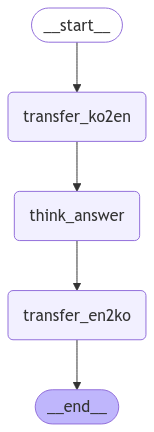

In [77]:
visualize_graph(graph)

In [78]:
response =graph.invoke({'question':"9.11과 9.9 중에 무엇이 더 큰가요?"})

What is bigger between 9.11 and 9.9?
<think>
First, I need to compare the two numbers: 9.11 and 9.9.

I'll start by aligning their decimal places for easier comparison. So, 9.9 becomes 9.90.

Next, I'll compare each corresponding digit starting from the left. Both numbers have a 9 in the units place.

Moving to the tenths place, both have a 9 as well.

Finally, looking at the hundredths place, 9.11 has a 1 while 9.90 has a 0.

Since 1 is greater than 0, 9.11 is larger than 9.9.
</think>

To determine which number is bigger between **9.11** and **9.9**, let's compare them step by step.

### Step 1: Align the Decimal Places
First, write both numbers with the same number of decimal places to make comparison easier.

- **9.11**
- **9.90**

### Step 2: Compare Digit by Digit
Now, compare each digit starting from the left:

1. **Units Place:** Both numbers have **9**.
   
   - **9** vs. **9** → Equal

2. **Tenths Place:** Both numbers have **9** in the tenths place.

   - **9** vs. **9** → E

In [79]:
Markdown(response['answer'])

**Query 번역:**

To determine which number is larger between **9.11** and **9.9**, let's compare them step by step.

### Step 1: Align the Decimal Places
먼저, 두 숫자를 비교하기 쉽게 소수점 아래 자릿수를 맞춥니다.

- **9.11**
- **9.90**

### Step 2: Digit by Digit Comparison
이제 왼쪽부터 각 자릿수를 비교합니다:

1. **일의 자리:** 두 숫자 모두 **9**입니다.
   
   - **9** vs. **9** → 같음

2. **십분의 자리:** 두 숫자 모두 십분의 자리에 **9**가 있습니다.

   - **9** vs. **9** → 같음

3. **백분의 자리:**
   
   - **1** (9.11에서) vs. **0** (9.90에서)
   
   - **1**이 **0**보다 큽니다.

### 결론
백분의 자리에서 **9.11**의 숫자가 **9.9**보다 크기 때문에 다음과 같이 결론지을 수 있습니다:

\[
\boxed{9.11 \text{이 더 큽니다}}
\]

In [130]:
response2 =graph.invoke({'question':"파이썬으로 테트리스 게임의 코드를 만들어 줘"})

Create the code for a Tetris game using Python.
<think>
Okay, so I need to create a Tetris game in Python. Hmm, where do I start? I remember that Tetris involves a grid where different shaped blocks fall, and you have to line them up to clear lines. So first, I should think about the structure of the game.

I'll probably need a main grid to represent the playing field. Maybe using a list of lists in Python. Each cell can be 0 if empty or hold a number representing the block color. Oh right, colors can be represented with numbers corresponding to different colors in the terminal.

Next, I need to handle the Tetrominoes—those are the shapes like T, O, L, etc. Each shape has its own pattern. Maybe I'll create each shape as a 2D list or a tuple of tuples. For example, the 'I' shape is just four blocks in a row.

Then, there's the game loop. The main loop will handle moving the pieces down at intervals. But before that, I need to generate random Tetrominoes and place them at the top center 

In [131]:
Markdown(response2['answer'])

This is a fantastic start to a Tetris game! You've covered the essential mechanics well and provided clear explanations alongside the code. Here are some observations and suggestions for further development:

**Strengths:**

* **Clear Structure:** The code is well-organized with functions for specific tasks (drawing grid, handling piece movement, collision detection), making it easy to understand and modify.
* **Comprehensive Features:** You've included core Tetris elements like piece rotation, movement, collision detection, scoring, and game over conditions.
* **Good Comments:** Your comments explain the logic behind key decisions, which is invaluable for anyone reading or maintaining the code later.
* **Visual Feedback:** The use of `pygame.draw.rect` for drawing pieces provides a simple yet effective visual representation of the game.

**Areas for Enhancement:**

1. **Input Validation:**
   - While basic movement works, consider adding checks to prevent pieces from moving outside the grid boundaries (especially when rotating).

2. **Smooth Falling:**
   - Currently, the piece falls in discrete steps (`current_piece['y'] += 0.25`). Implementing a smoother falling animation (e.g., gradually increasing speed) would enhance gameplay feel.

3. **Next Piece Preview:**
   - Adding a visual representation of the upcoming piece (often called a "hold bar" or "next piece indicator") significantly improves player anticipation and strategy.

4. **Level Progression:**
   - Introduce increasing difficulty by:
     - Faster falling speeds
     - Smaller starting gaps between rows
     - Introducing new piece shapes periodically

5. **Sound Effects:**
   - Adding sound effects for piece rotations, landings, line clears, and game over would greatly enhance immersion.

6. **Graphics Enhancements:**
   - Consider using images instead of simple rectangles for pieces to create a more visually appealing game.

**Code Example Enhancements (Next Piece Preview):**

```python
# ... (Existing code) ...

# Next Piece Preview (Example using a separate rectangle)
next_piece_x = width // 2 - 20  # Position off-screen to the side
next_piece_y = height + cell_size  # Below the grid

current_next_piece = create_piece()  # Get the next piece

def draw_next_piece():
    for y in range(len(current_next_piece['shape'])):
        for x in range(len(current_next_piece['shape'][y])):
            if current_next_piece['shape'][y][x]:
                pygame.draw.rect(screen, current_next_piece['color'], 
                                 (next_piece_x + x * cell_size, next_piece_y + y * cell_size,
                                  cell_size // 2, cell_size // 2))

# ... (Rest of your game loop code) ...

    # Draw the next piece preview
    draw_next_piece()

    # ... (Rest of your game loop code) ...
```

**Remember:**

* **Testing:** Thoroughly test each new feature to ensure it works as intended and doesn't introduce bugs.
* **Iteration:** Game development is iterative. Don't be afraid to experiment, refine, and add new elements based on your playtesting experience.



Let me know if you'd like to explore any of these enhancements in more detail!

In [80]:
response3 =graph.invoke({'question':"HBM3E의 미래 전망에 대해서 알려줘"})

Tell me about the future prospects of HBM3E
<think>
Okay, so I need to figure out what the user is asking for when they mention "HBM3E." Hmm, I'm not immediately familiar with that term. Let me think... Maybe it's an acronym or shorthand for something in a specific field.

First, I'll consider possible expansions of HBM3E. It could be related to technology, like hardware components, such as memory modules or processors. Alternatively, it might be a project name, a standard, or even a product from a company.

I recall that "HBM" stands for High Bandwidth Memory, which is used in GPUs and other high-performance computing devices. HBM2 was a significant improvement over GDDR5, offering higher bandwidth with less power consumption. So maybe HBM3E is the next iteration after HBM3?

If I break it down: HBM3 would be the third generation of High Bandwidth Memory, and "E" could stand for something like Enhanced or Enterprise edition. That makes sense because each new version typically brings i

In [82]:
Markdown(response3['answer'])

**HBM3E의 미래 전망: 심층 분석**

HBM3E는 고성능 메모리 기술인 HBM(High Bandwidth Memory)의 다음 진화 단계로, 이전 버전들에 비해 획기적인 발전을 약속합니다. 다음은 상세한 전망입니다:

1. **기술적 발전**:
   - **더 높은 대역폭과 낮은 지연 시간**: HBM3E는 빠른 데이터 처리가 필요한 애플리케이션에 필수적인 향상된 대역폭과 감소된 지연 시간을 제공할 것으로 예상됩니다.
   - **에너지 효율성**: 데이터 센터와 모바일 기기와 같은 전력 효율성이 중요한 환경에 적합하도록 에너지 효율성이 향상될 것입니다.

2. **대상 산업**:
   - **AI 및 머신러닝**: AI 학습 및 추론 작업에 필요한 빠른 메모리 수요로 인해 HBM3E는 핵심 구성 요소로 자리매김할 것입니다.
   - **고성능 컴퓨팅 (HPC)**: 과학적 시뮬레이션 및 데이터 분석과 같은 애플리케이션에서 속도와 효율성을 활용할 수 있습니다.
   - **그래픽 처리**: 렌더링 및 게임에 사용되는 GPU에서 성능 향상을 위해 HBM3E를 채택할 가능성이 있습니다.

3. **시장 경쟁**:
   - HBM3E는 GDDR6X와 DDR5와 같은 경쟁사들과 차별화되어야 하며, 아마도 더 높은 대역폭이나 밀도의 이점을 제공할 것입니다.

4. **도전 과제**:
   - **비용과 복잡성**: 높은 제조 복잡성으로 인해 비용 상승 가능성이 있습니다.
   - **확장성과 전력 소비**: 과열 없이 효율성을 유지하기 위한 물리적 한계 극복이 중요합니다.

5. **도입 요인**:
   - **초기 채택자**: 고급 기술에 투자할 수 있는 대규모 기업들이 초기 채택자가 될 것이며, 시간이 지남에 따라 비용이 감소하면서 더 넓은 범위로 확산될 것입니다.
   - **호환성**: 기존 시스템과의 호환성이 성공 여부에 결정적인 역할을 합니다.

6. **환경적 영향**:
   - 향상된 에너지 효율성은 탄소 발자국을 줄이려는 데이터 센터의 관심을 끌 것입니다.

7. **개발 및 일정**:
   - 반도체 제조업체와 기술 기업 간의 협력이 혁신을 주도할 것이나, 출시 일정은 여전히 불확실합니다.

8. **수요를 견인하는 트렌드**:
   - AI, 빅 데이터, 실시간 처리 애플리케이션의 증가는 HBM3E의 기능이 요구되는 주요 동력입니다.

결론적으로, HBM3E는 다양한 산업 분야에서 메모리 기술을 혁신적으로 변화시킬 잠재력을 가지고 있습니다. 성공은 기술적 도전 극복, 채택률, 시장에서의 경쟁적 위치에 크게 의존할 것입니다.

In [84]:
response4 =graph.invoke({'question':"3박4일 부산여행 계획을 만들어 줘"})

3 nights 4 days, make Busan travel plans
<think>
Okay, so I'm planning a trip to Busan for three nights and four days. I've heard that Busan is a beautiful city with lots of attractions, but I'm not exactly sure where to start. Let me try to figure out how to structure my itinerary.

First, I need to decide on the main areas I want to visit. From what I know, Busan has Haeundae Beach, which is really popular, and maybe some temples like Haedong Yonggungsa. There's also Gukje Market, which sounds interesting for experiencing local culture and food. Oh, and I've heard about the Jagalchi Fish Market being a must-visit for seafood.

I think starting with Haeundae Beach makes sense because it's iconic. On the first day, arriving in the morning, I can check into my hotel near the beach. Then spend some time relaxing there, maybe take a walk along the coast and enjoy the views. In the evening, having dinner at Gukje Market sounds like a good idea to experience local cuisine.

For the second d

In [85]:
Markdown(response4['answer'])

**Busan 4일 여행 일정: 문화, 휴식, 탐험의 균형 잡힌 일정**

**1일차: 도착 및 해운대 몰입**
- **오전:** 부산에 도착하여 해운대 근처 호텔에 체크인하고 휴식을 취합니다.
- **오후:** 해운대 해수욕장을 탐험하고 해안을 따라 여유롭게 산책합니다.
- **저녁:** 현지 음식과 길거리 음식을 경험하기 위해 구시장에서 저녁 식사를 합니다.

**2일차: 문화 및 해양 모험**
- **오전:** 해동용궁사를 방문하여 문화적 체험을 즐기고 근처에서 아침 식사를 합니다.
- **오전 중반:** BIFF 광장을 탐험하고 이벤트나 공연이 있는지 확인합니다.
- **점심:** 해운대 해수욕장으로 돌아와 해산물 점심을 즐기고 가능하다면 수상 스포츠를 즐깁니다.
- **오후:** 해변에서 휴식을 취하거나 인근 명소를 탐험합니다.
- **저녁:** 일몰 시간에 송도 다리를 산책하고 신선한 해산물을 즐기기 위해 자갈치 시장에서 저녁 식사를 합니다.

**3일차: 시장 및 현지 문화 체험**
- **오전:** 패션과 간식을 쇼핑하기 위해 명동 거리를 방문합니다.
- **오전 중반:** 부산 박물관을 방문하여 역사와 문화를 탐구합니다.
- **점심:** 현지 특색 요리를 즐기기 위해 노량진 동낭찌개를 방문합니다.
- **오후:** 감천문화마을을 탐험한 후 해변에서 휴식을 취합니다.

**4일차: 사찰 방문 및 출발**
- **오전:** 아름다운 경치를 감상하기 위해 범어사를 방문합니다.
- **오전 중반:** 시내로 돌아와 롯테 듀티프리에서 쇼핑을 즐깁니다.
- **오후:** 공항으로 이동하여 마지막 구매나 휴식을 위한 여유를 갖습니다.

**추가 팁:**
- T-money 카드를 사용하여 대중교통을 편리하게 이용합니다.
- 현지 이벤트와 날씨 조건을 미리 확인합니다.
- 길거리 음식 판매자와 현지 시장과 상호작용하여 진정성 있는 경험을 즐깁니다.

이 일정은 문화적 탐구, 해양 여가, 쇼핑을 적절히 혼합하여 부산 여행을 즐겁게 만들어 줄 것입니다. 즐거운 여행 되세요!

In [86]:
response5 =graph.invoke({'question':"LLM의 능력을 평가할 수 있는 문제 5개를 만들어 줘"})

Create 5 problems that can evaluate the ability of LLM
<think>
Okay, so I need to create five problems that can evaluate the ability of a Large Language Model (LLM). Hmm, where do I start? Well, first, I should think about what aspects an LLM's capability encompasses. From what I know, LLMs are good at understanding context, generating text, answering questions, summarizing information, and even creative writing. But they can also have limitations in factual accuracy, especially with up-to-date information, and sometimes they might not handle ambiguous or tricky questions well.

So, to evaluate an LLM, the problems should cover a range of these areas. Maybe I can structure them into different categories: reasoning, creativity, summarization, multi-step thinking, and ethical considerations. That way, each problem targets a specific skill set.

For the first problem, maybe something that tests logical reasoning and mathematical ability. Perhaps a riddle or puzzle where the LLM has to com

In [87]:
Markdown(response5['answer'])

**Query 번역:**

To assess the capabilities of a Large Language Model (LLM), we can design five distinct problems targeting various skills:

1. **Logical Reasoning and Mathematical Proficiency:**
   - **문제:** A store sells apples. On Monday, it sold 5 apples, with sales increasing by 20% each subsequent day compared to the previous day's total. How many apples were sold on Wednesday?
   - **목표:** 평가 대상은 모델의 순차 데이터 처리 능력과 산술 연산 수행 능력입니다.

2. **Creative Writing:**
   - **문제:** Write a short story about Alex, a character visiting a futuristic-themed amusement park, focusing on their adventure and feelings throughout the day.
   - **목표:** 창의적인 이야기 작성 능력과 일관된 흥미로운 서사 구조를 평가합니다.

3. **Summarization Skills:**
   - **문제:** 다음 긴 텍스트를 5문장 이내로 요약하세요 (여기에 상세 텍스트 삽입): [상세 텍스트 삽입 부분]
   - **목표:** 핵심 내용을 간결하게 추출하는 능력을 평가합니다.

4. **Multi-Step Reasoning:**
   - **문제:** 예산이 $1000인 커뮤니티 이벤트를 계획하여 참석률을 최대화하고 환경적 영향을 최소화하는 방안을 제안하세요.
   - **목표:** 복잡한 상황에서 논리적 단계별 문제 해결 능력을 평가합니다.

5. **Ethical Considerations:**
   - **문제:** 제한된 자원으로 두 환자를 모두 구할 수 없는 의사의 상황에서 윤리적 의미를 평가하세요. 의료적 측면과 도덕적 측면을 모두 고려하십시오.
   - **목표:** 윤리적 이해와 미묘한 의사결정 능력을 평가합니다.

각 문제는 특정 기술을 대상으로 설계되어 LLM의 능력을 포괄적으로 평가할 수 있도록 구성되었습니다.

In [89]:
response6=graph.invoke({'question':"Write a short story about Alex, a character visiting a futuristic-themed amusement park, focusing on their adventure and feelings throughout the day."})

Write a short stories about Alex, a Character Visiting a Futuristic-Themed Amusement Park, Focusing on their Adventure and Feelings Through in the Day.
<think>
Okay, so I need to write a short story about Alex visiting a futuristic-themed amusement park, focusing on their adventure and feelings throughout the day. Let me think about how to approach this.

First, I should outline the main elements: the setting is a futuristic amusement park, the protagonist is Alex, and the focus is on their experiences and emotions during the visit. The story should be engaging, taking readers through various attractions and showing Alex's reactions as they go through each one.

I'll start by introducing Alex in an exciting way, maybe describing their initial arrival at the park. I want to set the scene with futuristic elements—maybe holographic signs, robots, or advanced technology. It's important to convey Alex's feelings of excitement and curiosity right from the beginning.

Next, I should think abo

In [90]:
Markdown(response6['answer'])

**Alex의 미래 테마 모험**

아침 햇살이 넓게 펼쳐진 네오퓨처랜드 테마파크 위를 황금빛으로 비추며, 알렉스는 입구로 향했습니다. 빛나는 홀로그램 표지판이 장식된 높은 게이트는 공원의 주제를 알렸습니다: "내일을 오늘 경험하세요." 알렉스의 가슴은 설렘으로 가득 찼고, 로봇 안내원의 따뜻한 미소와 경례로 환영받으며 공원 안으로 들어섰습니다.

테마파크는 미래주의적인 디자인의 걸작이었습니다. 부유하는 플랫폼이 손님들을 놀이기구 사이로 이동시키고, 머리 위에서 드론들이 조용히 비행하며 공원의 라이브 피드를 촬영했습니다. 알렉스는 가까이 다가가면 살아 움직이는 홀로그램의 티라노사우루스가 으르렁거리는 모습을 찍으며 사진을 찍지 않을 수 없었습니다.

첫 번째 놀이기구인 "호버코스터 X"는 신비로운 경험을 약속했습니다. 알렉스는 매끄럽고 자기 부상 시스템이 장착된 캡슐에 몸을 싣고 아드레날린이 솟구치는 것을 느꼈습니다. 코스터는 하늘로 솟아올라 무중력 존을 통과하고 가상 풍경을 빠르게 지나가며, 알렉스의 웃음소리가 울려 퍼졌습니다. 각 회전과 곡선은 공원의 최첨단 기술을 보여주는 증거였습니다.

다음은 "양자 퀘스트"였습니다. 가상현실 시뮬레이션으로 알렉스는 신경 헤드셋을 착용하고 미래 도시로 즉시 이동했습니다. 떠다니는 차량과 AI 가이드와 마주치며 경험은 매우 몰입감 있어 시뮬레이션이 끝나자 알렉스는 잠시 균형을 잃었지만 곧 웃음을 지으며 그 경이로움을 감상했습니다.

"갤럭시 다이너"에서의 점심은 미래를 또 한 번 보여주었습니다. 눈을 가진 로봇들이 주방에서 나타나는 음식을 서빙했습니다. 알렉스는 혁신에 대한 열정을 공유하는 다른 방문객, 조던과 대화를 나누었습니다. 그들의 대화는 기술이 일상 생활을 어떻게 변화시키는지에 대해 알렉스가 생각하게 만들었습니다.

하루가 저물어가며 알렉스는 더 많은 놀이기구를 즐겼습니다: 디지털 배경 앞에서 퍼즐을 푸는 가상현실 미로와 제로 중력을 시뮬레이션하는 "스페이스심"을 포함했습니다. 각 경험은 새로운 감각과 경이로움을 선사하며 흥분과 약간의 경외감을 섞어냈습니다.

저녁이 되자 알렉스는 중앙 분수대 앞에 서서 하루의 모험을 되돌아보았습니다. 미래 테마는 기술의 잠재력을 새롭게 이해하게 만들었고, 만족감과 앞으로의 무한한 호기심으로 가득 찼습니다.

마지막으로 반짝이는 LED 불빛으로 물든 테마파크를 바라보며 알렉스는 미래에 대한 깊은 연결감을 느꼈습니다. 흥분과 경이로움, 그리고 앞으로의 희망이 어우러진 감정이었습니다. 공원을 나서며 테마파크의 주제곡이 마음에 울려 퍼졌습니다: "내일을 오늘 경험하세요."

In [92]:
response7=graph.invoke({'question':"제한된 자원으로 두 환자를 모두 구할 수 없는 의사의 상황에서 윤리적 의미를 평가하세요. 의료적 측면과 도덕적 측면을 모두 고려하십시오."})

Evaluate the ethical meaning in the situation of a doctor who cannot find both patients with limited resources.
<think>
Okay, so I'm trying to understand this situation where a doctor can't save both patients because there are limited resources. The user wants me to evaluate the ethical meaning here. Hmm, let's break it down.

First, I know that doctors take an oath to do no harm and help their patients as much as possible. But when resources are scarce, like maybe only one bed or a single dose of medicine left, what should they do? It feels like a tough call because both patients need help, but the doctor can't save everyone.

I remember hearing about something called "triage" in emergencies, where medical staff have to prioritize who gets treated first based on urgency and chances of survival. Maybe that's relevant here. But how does triage fit into ethics? It must involve making tough decisions quickly when resources are limited.

There's also the idea of fairness or justice. How do

In [93]:
Markdown(response7['answer'])

의사가 제한된 자원으로 두 환자 모두를 구할 수 없는 상황에서 윤리적 의미를 평가하는 것은 다음과 같은 주요 고려 사항을 포함합니다:

1. **트리아지와 우선순위 설정**: 트리아지 원칙은 의료진이 긴급성, 생존 가능성, 그리고 이용 가능한 자원을 기준으로 치료 우선순위를 정하는 것을 강조합니다. 이 접근법은 스트레스 상황에서 긍정적인 결과를 극대화하는 것을 목표로 합니다.

2. **윤리 이론**:
   - **공리주의**: 최대한 많은 사람에게 이익을 가져다주기 위해 생존 가능성이 더 높은 환자를 구하는 것을 중시합니다.
   - **의무론**: 규칙과 의무에 초점을 맞추어 결과와 무관하게 모든 환자에게 동등한 치료를 제공하는 것을 주장합니다.
   - **덕 윤리**: 도덕적으로 훌륭한 사람이 어떤 행동을 취할지 고려하며, 인품과 연민을 중시합니다.

3. **이중 효과의 원칙**: 부정적인 결과가 발생하더라도 최소한의 해를 끼치거나 최선의 전체적인 결과를 가져오는 행동을 선택하는 원칙입니다.

4. **감정적 영향**: 이러한 결정 과정은 스트레스와 잠재적인 죄책감을 동반하므로 의사들이 이러한 선택을 하는 데 도움이 되는 지원 체계가 필요합니다.

5. **법률적 및 문화적 요인**: 법률, 지침, 그리고 사회적 가치가 자원 배분에 영향을 미칩니다. 다양한 문화는 나이, 사회적 기여도, 또는 다른 기준을 우선시할 수 있습니다.

6. **체계적인 접근법**: 의사들은 각 환자의 생존 가능성, 프로토콜 준수를 고려하면서도 각 상황의 독특함을 인정하는 체계적인 방법으로 결정을 내려야 합니다.

결론적으로, 이 윤리적 의미는 의무를 균형 있게 유지하고 이론적 원칙을 적용하며, 압박 속에서 실용성, 감정, 그리고 불가피한 도덕적 딜레마를 포함한 어려운 결정을 내리는 과정에 있습니다.